In [75]:
print("Wildfire prediction based on climate using various machine learing models to evaluvate best prediction model")

Wildfire prediction based on climate using various machine learing models to evaluvate best prediction model


In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model 
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
%matplotlib inline

In [77]:
df= pd.read_csv(r"/Users/lakshaynaresh/Desktop/WildfireAI Project/Mendocino,CA Weather Dataset.csv")

df

,datetime,tempmax,tempmin,temp,dew,humidity,precip,preciptype,windgust,windspeed,wildfire
0,6/1/2018,79.4,43.8,61.9,39.9,49.6,0.0,NaN,23.0,12.0,NaN
1,6/2/2018,97.1,50.9,72.7,44.5,43.7,0.0,NaN,19.7,15.9,NaN
2,6/3/2018,96.2,55.1,74.0,45.8,43.3,0.0,NaN,23.0,16.3,NaN
3,6/4/2018,76.2,55.9,66.2,39.8,40.8,0.0,NaN,19.7,11.6,NaN
4,6/5/2018,74.5,50.0,61.7,41.3,49.0,0.0,NaN,20.8,13.1,NaN
...,...,...,...,...,...,...,...,...,...,...,...
262,10/19/2020,92.0,50.2,66.5,44.0,49.5,0.0,NaN,16.1,8.1,NaN
263,10/20/2020,92.9,48.7,65.9,42.3,47.9,0.0,NaN,12.8,7.7,1.0
264,10/21/2020,83.2,49.0,64.6,44.7,52.7,0.0,NaN,17.2,8.8,NaN
265,10/22/2020,82.3,48.0,62.6,42.2,52.5,0.0,NaN,16.1,5.2,NaN


In [78]:
# Dropping date, preciptype
df = df.drop(['datetime','preciptype'], axis=1)
df

,tempmax,tempmin,temp,dew,humidity,precip,windgust,windspeed,wildfire
0,79.4,43.8,61.9,39.9,49.6,0.0,23.0,12.0,NaN
1,97.1,50.9,72.7,44.5,43.7,0.0,19.7,15.9,NaN
2,96.2,55.1,74.0,45.8,43.3,0.0,23.0,16.3,NaN
3,76.2,55.9,66.2,39.8,40.8,0.0,19.7,11.6,NaN
4,74.5,50.0,61.7,41.3,49.0,0.0,20.8,13.1,NaN
...,...,...,...,...,...,...,...,...,...
262,92.0,50.2,66.5,44.0,49.5,0.0,16.1,8.1,NaN
263,92.9,48.7,65.9,42.3,47.9,0.0,12.8,7.7,1.0
264,83.2,49.0,64.6,44.7,52.7,0.0,17.2,8.8,NaN
265,82.3,48.0,62.6,42.2,52.5,0.0,16.1,5.2,NaN


In [79]:
print("Set 0 for all no wildfire occerences")
df['wildfire'] = df['wildfire'].replace(np.nan, 0)
df

Set 0 for all no wildfire occerences


,tempmax,tempmin,temp,dew,humidity,precip,windgust,windspeed,wildfire
0,79.4,43.8,61.9,39.9,49.6,0.0,23.0,12.0,0.0
1,97.1,50.9,72.7,44.5,43.7,0.0,19.7,15.9,0.0
2,96.2,55.1,74.0,45.8,43.3,0.0,23.0,16.3,0.0
3,76.2,55.9,66.2,39.8,40.8,0.0,19.7,11.6,0.0
4,74.5,50.0,61.7,41.3,49.0,0.0,20.8,13.1,0.0
...,...,...,...,...,...,...,...,...,...
262,92.0,50.2,66.5,44.0,49.5,0.0,16.1,8.1,0.0
263,92.9,48.7,65.9,42.3,47.9,0.0,12.8,7.7,1.0
264,83.2,49.0,64.6,44.7,52.7,0.0,17.2,8.8,0.0
265,82.3,48.0,62.6,42.2,52.5,0.0,16.1,5.2,0.0


In [80]:
x = df.drop('temp',axis=1)
y= df['temp']

# Separate dataset into training dataset and testing data set (80/20)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=0)



In [81]:
x_train.corr()

,tempmax,tempmin,dew,humidity,precip,windgust,windspeed,wildfire
tempmax,1.000000,0.444619,0.069471,-0.646178,-0.183103,-0.178909,0.026501,0.126219
tempmin,0.444619,1.000000,0.590760,-0.115585,0.084842,0.060068,0.184907,0.040065
dew,0.069471,0.590760,1.000000,0.599552,0.070475,-0.088399,-0.042413,0.067574
humidity,-0.646178,-0.115585,0.599552,1.000000,0.171295,-0.113414,-0.216718,0.056113
precip,-0.183103,0.084842,0.070475,0.171295,1.000000,0.076885,0.033868,-0.065837
windgust,-0.178909,0.060068,-0.088399,-0.113414,0.076885,1.000000,0.660417,-0.156295
windspeed,0.026501,0.184907,-0.042413,-0.216718,0.033868,0.660417,1.000000,-0.112219
wildfire,0.126219,0.040065,0.067574,0.056113,-0.065837,-0.156295,-0.112219,1.000000


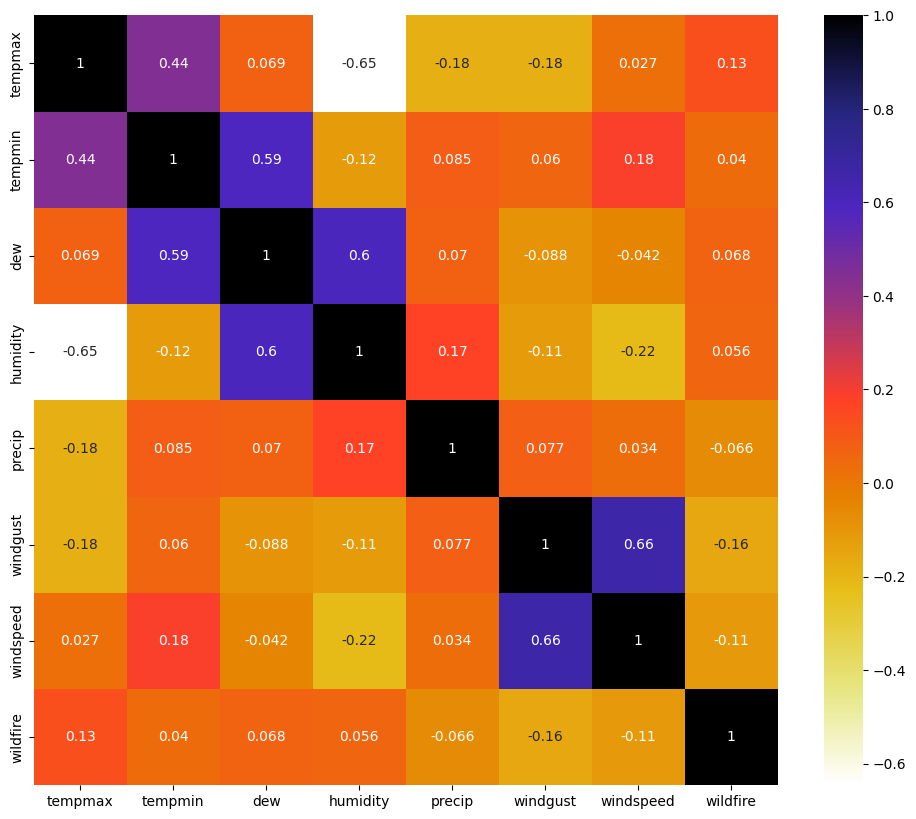

In [82]:
#Using Pearson Correlation remove highly corrrelated features
plt.figure(figsize=(12,10))
cor = x_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [83]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr
    # features which has correlation more than 0.75
corr_features = correlation(x_train, 0.75)
corr_features

set()

In [84]:
x_train.drop(corr_features,axis=1, inplace=True)
x_test.drop(corr_features,axis=1, inplace=True)
x_train.shape, x_test.shape

((213, 8), (54, 8))

In [85]:
org_x_train = x_train
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


Text(0.5, 1.0, 'X_train After Scaling')

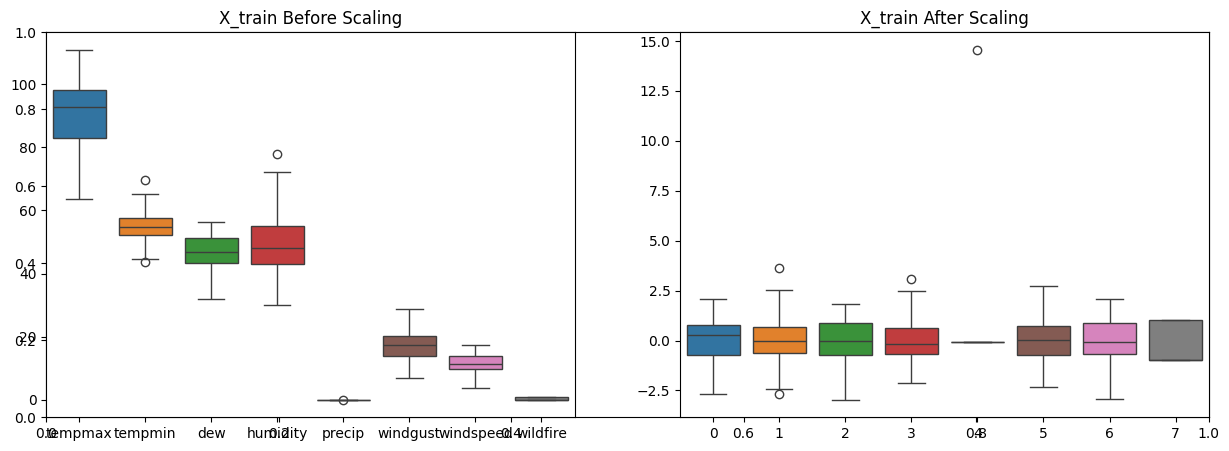

In [86]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=org_x_train)
plt.title('X_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=x_train)
plt.title('X_train After Scaling')

In [87]:
# Create a LinearRegression Model
reg = linear_model.LinearRegression()
reg.fit(x_train,  y_train)
reg_pred = reg.predict(x_test)

mae = mean_absolute_error(y_test, reg_pred)
r2 = r2_score(y_test, reg_pred)

In [88]:
reg_pred

array([74.70410493, 73.1903755 , 67.36353027, 60.20888342, 68.27454071,
       66.36693309, 67.62393094, 71.09400049, 77.03223154, 76.24743765,
       63.13617005, 76.2937192 , 73.97084929, 68.05109965, 71.55285911,
       64.35824113, 80.74206268, 73.91689012, 72.19892566, 80.48189509,
       73.38325703, 78.17062584, 69.72404217, 64.2891323 , 65.04952291,
       75.27883384, 64.63287401, 68.17781311, 71.14435911, 73.27352106,
       64.33196228, 68.33623901, 74.37073363, 67.64252327, 67.9814169 ,
       62.45396107, 73.39677643, 68.36729479, 74.04827463, 68.44646779,
       74.89965155, 61.28202198, 71.531551  , 68.47595369, 71.55421989,
       63.00535688, 77.84710372, 77.39906786, 71.87120444, 72.05920003,
       68.63243763, 79.56046291, 73.66826694, 66.78447297])

In [89]:
print("Linear Regression")
print ("R2 Score: {:.4f}".format(r2))
print ("MAE: {:.4f}".format(mae))

Linear Regression
R2 Score: 0.9670
MAE: 0.7304


In [90]:
# Create a Lasso Model
lasso = Lasso()
lasso.fit(x_train, y_train)
lasso_pred = lasso.predict(x_test)
mae = mean_absolute_error(y_test, lasso_pred)
r2 = r2_score(y_test, lasso_pred)


print("Lasso Regression")
print ("R2 Score: {:.4f}".format(r2))
print ("MAE: {:.4f}".format(mae))

Lasso Regression
R2 Score: 0.9073
MAE: 1.3218


In [91]:
# Create a K_NeighborsRegressor Model
knn = KNeighborsRegressor()
knn.fit(x_train, y_train)
knn_pred = knn.predict(x_test)
mae = mean_absolute_error(y_test, knn_pred)
r2 = r2_score(y_test, knn_pred)


print("K_Neighbours Regressor")
print ("R2 Score value: {:.4f}".format(r2))
print ("MAE value: {:.4f}".format(mae))

K_Neighbours Regressor
R2 Score value: 0.8671
MAE value: 1.4226


In [92]:
# Create a Support Vector Regressor Model
svr = SVR()
svr.fit(x_train, y_train)
svr_pred = svr.predict(x_test)
mae = mean_absolute_error(y_test, svr_pred)
r2 = r2_score(y_test, svr_pred)


print("Support Vector Regressor")
print ("R2 Score value: {:.4f}".format(r2))
print ("MAE value: {:.4f}".format(mae))

Support Vector Regressor
R2 Score value: 0.8180
MAE value: 1.4461


In [93]:
# Create a Random Forest Regressor Model
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
rf_pred = rf.predict(x_test)
mae = mean_absolute_error(y_test, rf_pred)
r2 = r2_score(y_test, rf_pred)


print("Random Forest Regressor")
print ("R2 Score value: {:.4f}".format(r2))
print ("MAE value: {:.4f}".format(mae))

Random Forest Regressor
R2 Score value: 0.9236
MAE value: 1.0331
